In [2]:
#Data Capstone project
# Perform EDA on 911 dataset from Kaggle

In [69]:
#imports
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt


# **Data**
**Perform EDA on 911 dataset from kaggle**



Step 1 - Retrieve Data from Kaggle


In [4]:
# use Kaggle api to fetch data
api = KaggleApi()
api.authenticate()

In [5]:
df = pd.read_csv('911.csv.zip')

In [6]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
# check head
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**What are the top 5 zipcodes for 911 calls?**

In [8]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**What are the top 5 townships for 911 calls**

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [10]:
df['title'].nunique()

148

### Creating new features
**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. *

In [11]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0] )

**What is the most common Reason for a 911 call based off of this new column?**

In [12]:
df['Reason'].value_counts().head(5)

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

In [13]:
import seaborn as sns

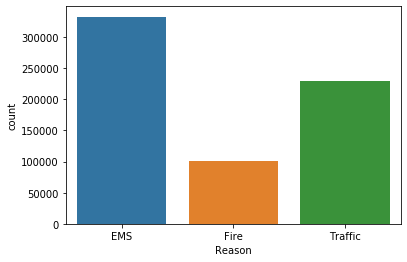

In [15]:
sns.countplot(x='Reason', data=df)

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [24]:
type(df['timeStamp'].iloc[0])

str

**You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.**

In [26]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**You can now grab specific attributes from a Datetime object by calling them. For example:**

- time = df['timeStamp'].iloc[0]
- time.hour

You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.

In [40]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [37]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [41]:
df['Day'] = df['Day'].map(dmap) 

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

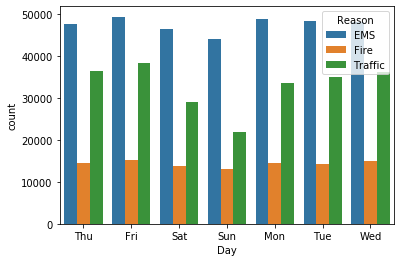

In [45]:
sns.countplot(x='Day', hue='Reason', data = df)

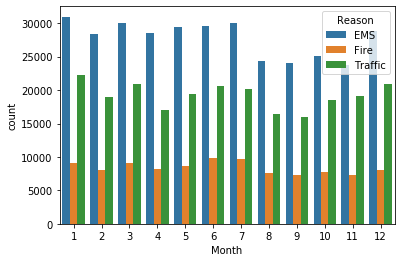

In [46]:
sns.countplot(x='Month', hue='Reason', data = df)

Did you notice something strange about the Plot?

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [47]:
byMonth = df.groupby('Month').count()

In [50]:
byMonth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 12 columns):
lat          12 non-null int64
lng          12 non-null int64
desc         12 non-null int64
zip          12 non-null int64
title        12 non-null int64
timeStamp    12 non-null int64
twp          12 non-null int64
addr         12 non-null int64
e            12 non-null int64
Reason       12 non-null int64
Hour         12 non-null int64
Day          12 non-null int64
dtypes: int64(12)
memory usage: 1.2 KB


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

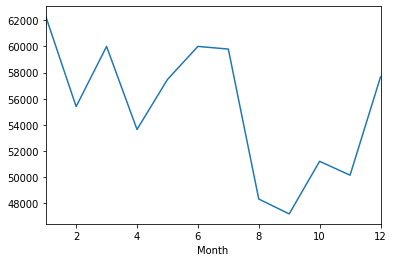

In [55]:
byMonth['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

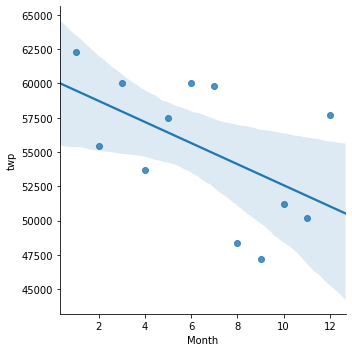

In [56]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

*Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. *

In [57]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

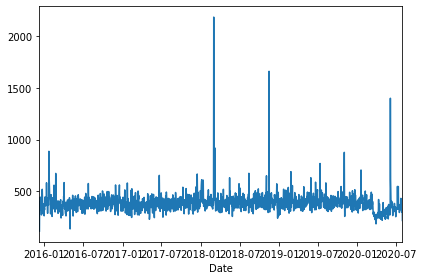

In [71]:
# only looks like this because this is multiple years - not grouped by year yet
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

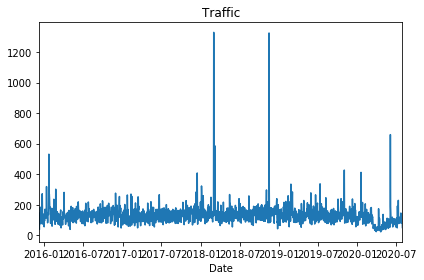

In [72]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

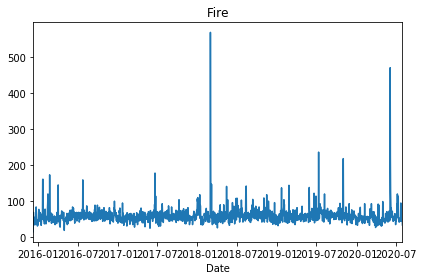

In [74]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

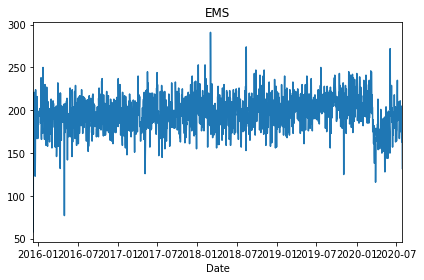

In [75]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [76]:
# group by year to make more sense of data since it's larger than just one year 
df['Year'] = df['timeStamp'].apply(lambda time: time.year)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

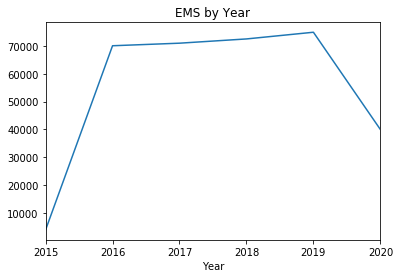

In [79]:
df[df['Reason']=='EMS'].groupby('Year').count()['twp'].plot()
plt.title('EMS by Year')
plt.tight_layout

** Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!**

In [81]:
dayHour = df.groupby(by=['Day', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


** Now create a HeatMap using this new DataFrame. **

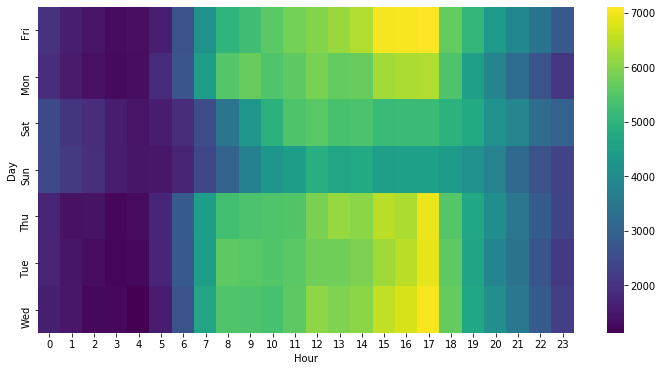

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

<Figure size 864x432 with 0 Axes>

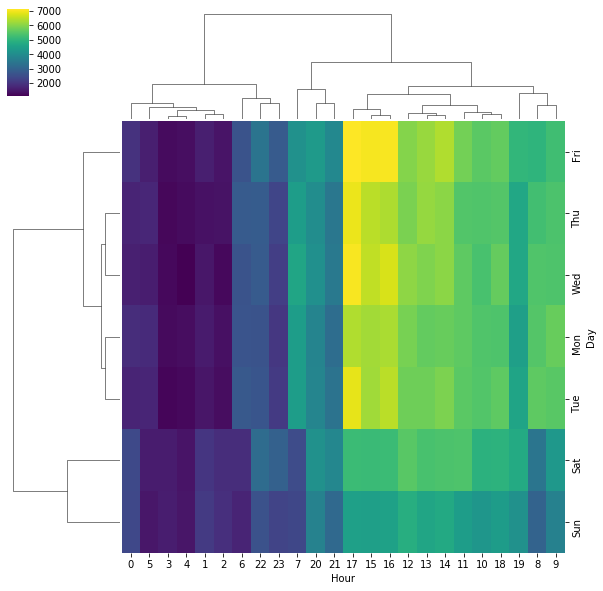

In [83]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [86]:
monthHour = df.groupby(by = ['Day', 'Month']).count()['Reason'].unstack()
monthHour.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


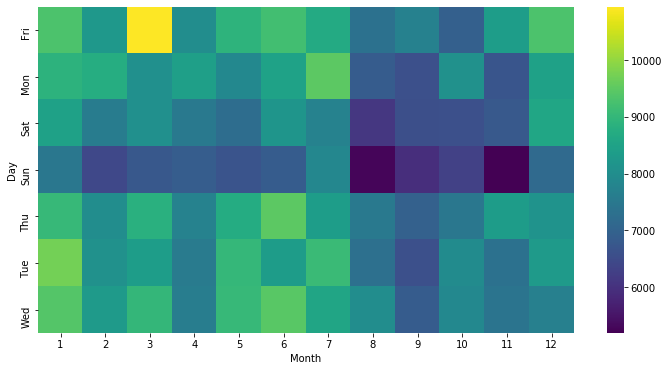

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(monthHour,cmap='viridis')

<Figure size 864x432 with 0 Axes>

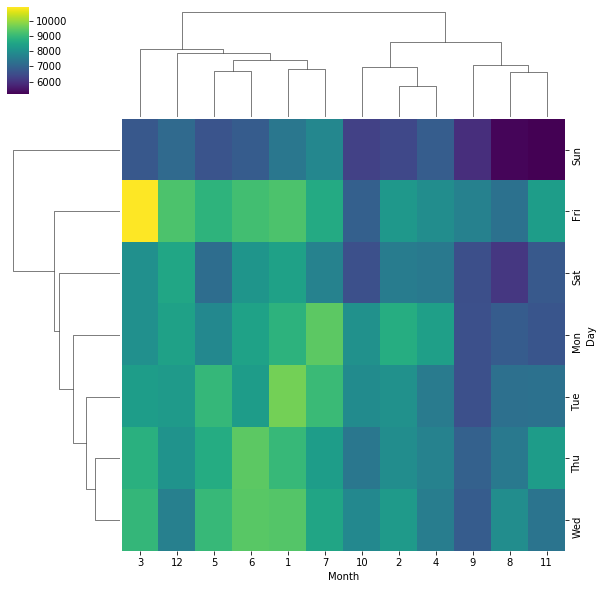

In [88]:
plt.figure(figsize=(12,6))
sns.clustermap(monthHour,cmap='viridis')

In [ ]:
#complete